In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X = df.drop(['stroke',"id"], axis=1)
y = df['stroke']



# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
# Split your data into training and testing sets
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [ ]:

# Train your model (example using RandomForestClassifier)
clf_re = RandomForestClassifier(random_state=42)
clf_re.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = clf_re.predict(X_test_resampled)

# Evaluate your model
print(classification_report(y_test_resampled, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.94      0.96       922
           1       0.95      0.97      0.96       958

    accuracy                           0.96      1880
   macro avg       0.96      0.96      0.96      1880
weighted avg       0.96      0.96      0.96      1880



In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

# Train your model (example using RandomForestClassifier)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate your model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pickle

# Open the file in binary mode
with open("random_forest.pkl", 'wb') as file:
    # Serialize and write the variable to the file
    pickle.dump(clf_re, file)

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 10.3 MB/s eta 0:00:00


In [ ]:
import shap

In [ ]:
shap.initjs()

In [ ]:
explainer = shap.Explainer(clf_re)
#shap_values_cat= explainer(X_test_resampled)

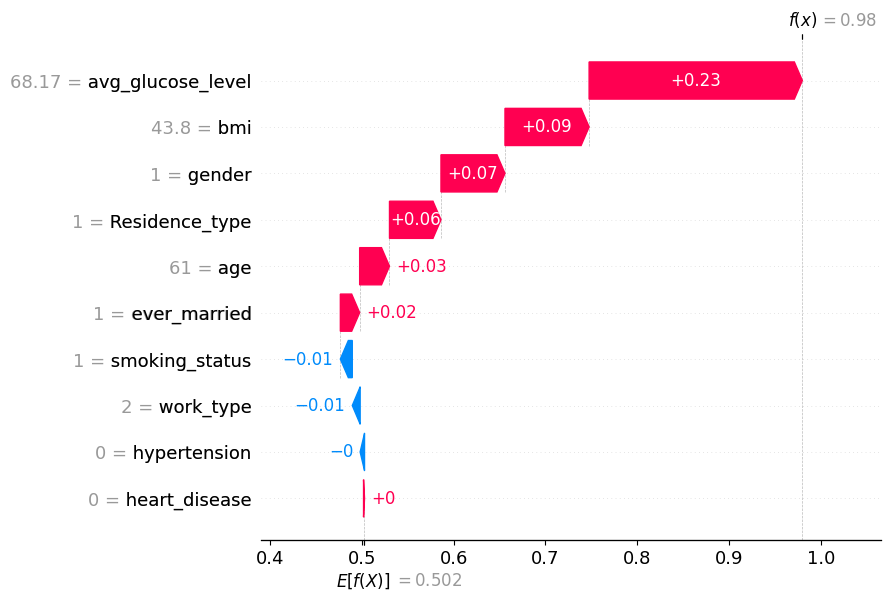

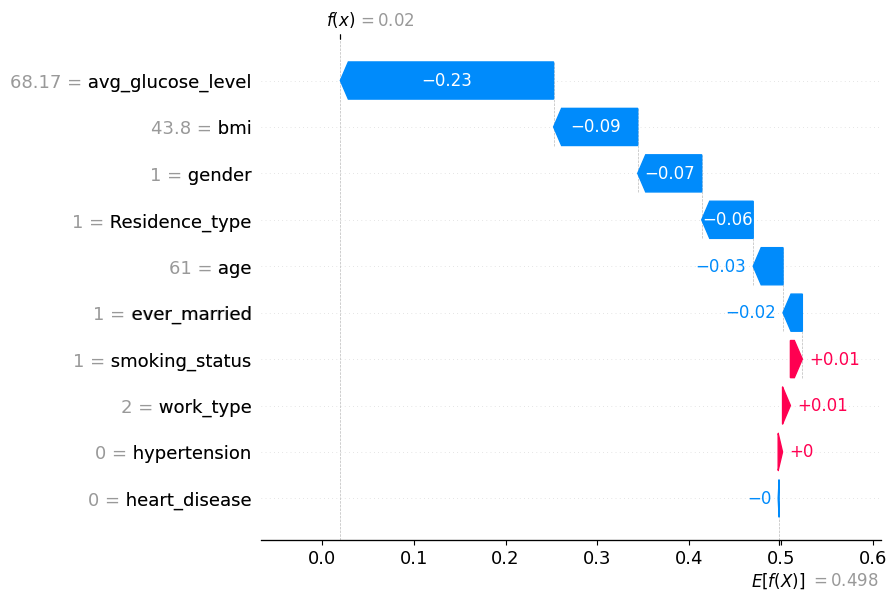

In [ ]:
# waterfall plot for class 0
shap.plots.waterfall(shap_values_cat[0,:,0])

# waterfall plot for class 1
shap.plots.waterfall(shap_values_cat[0,:,1])



In [ ]:
y_test_resampled

3742    0
4836    0
4541    0
5268    1
3782    0
       ..
1219    0
3918    0
2650    0
2246    0
8142    1
Name: stroke, Length: 1880, dtype: int64

In [ ]:
clf_re.predict(X_test_resampled.loc[[1219]])[0]

0

In [ ]:
# prompt: select multiple items in a list by index

list = [1, 2, 3, 4, 5, 6, 7, 8, 9]

# Select items at indices 2, 4, and 7
selected_items = [list[2], list[4], list[7]]

print(selected_items)


[ 0.03395264 -0.03395264]


In [ ]:
X_test_resampled.loc[[3745]]


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3745,1,66,0,0,1,3,0,106.1,31.5,3


In [ ]:
choosen_instance = X_test_resampled.loc[[1219]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[..., 0],choosen_instance)

In [ ]:
shap_values[0]

array([[ 0.03395264, -0.03395264],
       [-0.14446947,  0.14446947],
       [-0.00385104,  0.00385104],
       [ 0.09140782, -0.09140782],
       [ 0.01761195, -0.01761195],
       [ 0.15750529, -0.15750529],
       [ 0.09772637, -0.09772637],
       [ 0.09285502, -0.09285502],
       [ 0.02238145, -0.02238145],
       [ 0.02300846, -0.02300846]])

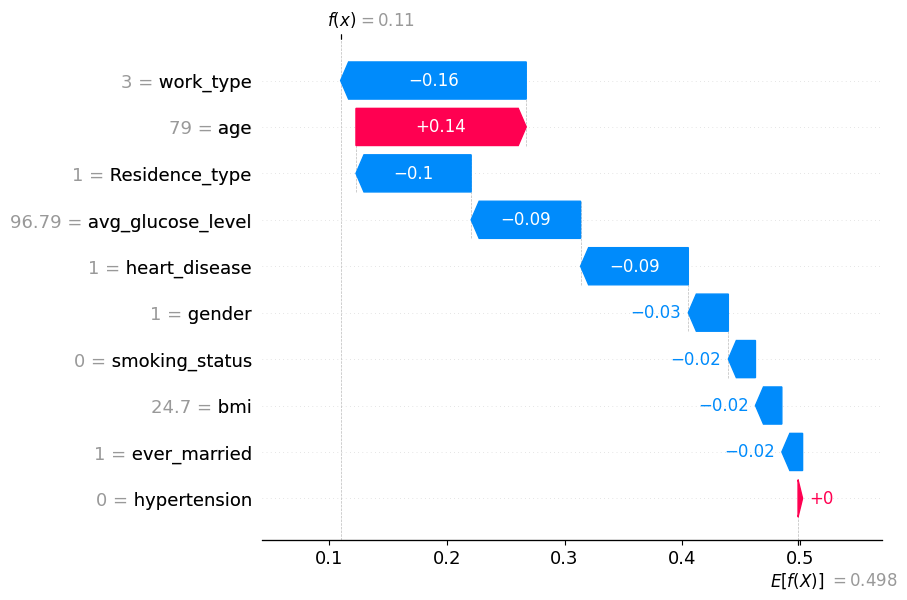

In [ ]:

shap.plots.waterfall(explainer(choosen_instance)[0,:,1])